#Problem 4

The problem is an example of a steady state BVP of the elliptic type. The domain is discretized as directed by the following code

In [5]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline
a = 5 #length sclae
b = 4 #Width Scale
T1 = 80 #Boundary Value Temperature
x = np.linspace(0,a,40) #Discretizing Length
y = np.linspace(0,b,32) #Discretizing width
X,Y = np.meshgrid(x,y) #Converting to mesh form


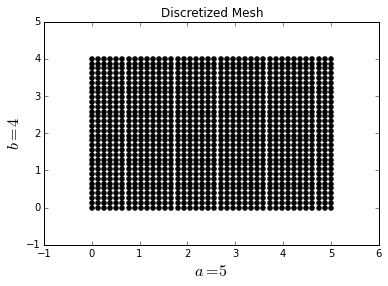

In [57]:
cont = pyplot.scatter(X,Y, color = 'black', s = 20, marker = 'o')
pyplot.xlabel('$a=5$', fontsize = 16)
pyplot.ylabel('$b=4$', fontsize = 16)
pyplot.title('Discretized Mesh')

In [44]:
n = np.zeros(20)
for i in range(1,21):
    n[i-1] = (2*i - 1)
s = 0 
for i in range(0,20):  #adding from n=1 to n = 20
    q = (np.sin(n[i]*np.pi*X/a))/n[i]
    w = np.sinh(n[i]*np.pi*Y/a)
    e = np.sinh(n[i]*np.pi*b/a)
    temp = np.around((q*w)/e,decimals = 2) #rounding off to two significant digits
    s = (s+temp)
T = (4*T1/np.pi)*s

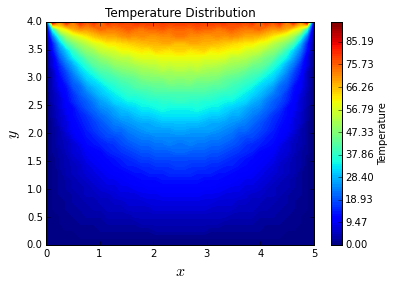

In [60]:
cont = pyplot.contourf(X,Y,T,levels = np.linspace(T.min(),T.max(),100))
cbar = pyplot.colorbar(cont)
pyplot.xlabel('$x$', fontsize = 16)
pyplot.ylabel('$y$', fontsize = 16)
pyplot.title('Temperature Distribution')
cbar.set_label('Temperature' , fontsize = 10)

In [46]:
su = 0 
for i in reversed(range(0,20)): #adding in reversed order
    q = (np.sin(n[i]*np.pi*X/a))/n[i]
    w = np.sinh(n[i]*np.pi*Y/a)
    e = np.sinh(n[i]*np.pi*b/a)
    temp = np.around((q*w)/e,decimals = 2)
    su = (su+temp)
L = (4*T1/np.pi)*su

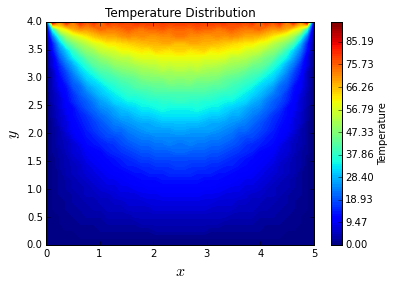

In [61]:
cont = pyplot.contourf(X,Y,L,levels = np.linspace(L.min(),L.max(),100))
cbar = pyplot.colorbar(cont)
pyplot.xlabel('$x$', fontsize = 16)
pyplot.ylabel('$y$', fontsize = 16)
pyplot.title('Temperature Distribution')
cbar.set_label('Temperature' , fontsize = 10)

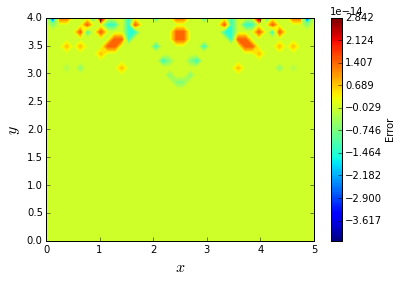

In [54]:
E = L - T #Error
cont = pyplot.contourf(X,Y,E,levels = np.linspace(E.min(),E.max(),100))
cbar = pyplot.colorbar(cont)
pyplot.xlabel('$x$', fontsize = 16)
pyplot.ylabel('$y$', fontsize = 16)
cbar.set_label('Error' , fontsize = 10)

In [51]:
print(T.min())
print(T.max())
print(L.min())
print(L.max())
print(E.min())
print(E.max())


0.0
93.7104304925
0.0
93.7104304925
-4.26325641456e-14
2.84217094304e-14


As we can see from the above code block, while a finite error does exist, both the addition methods have identical maxima and minima leading us to believe that they are equally accurate. 

The presence of finite error especially in the regions which have larger values is indicative of the fact that roundoff error does exist and can be propagated, especially if we are looking at large series.